# **Pokemon: In-depth Stats Analysis + Buidling Legendary Pokemon Predictor**

**Hi Trainers!**

My name's Giselle, and I'm your guide on this Pokémon data adventure. Think of me as your very own Professor Oak, but without the lab coat (and probably without the same level of expertise). Let's dive into the world of Pokémon stats and uncover some amazing facts!

Our mission is to become the ultimate Pokémon analysts! We'll explore the depths of Pokémon stats, types, and generations to determine which Pokémon reigns supreme. We'll also build a super-smart machine to predict which Pokémon are worthy of the legendary title.

**Why Does This Matter?**

Understanding Pokémon is like mastering a new type. It's about strategy, knowledge, and a little bit of luck. By analyzing their strengths and weaknesses, we can gain a competitive edge in the Pokémon world. Plus, it's just plain fun to explore the data and uncover hidden patterns!

Before we dive into the action, let's understand our Pokémon data. We'll be working with the following information:

* **#:** A unique number for each Pokémon.
* **Name:** The Pokémon's name.
* **Type 1:** The Pokémon's primary type.
* **Type 2:** The Pokémon's secondary type, if any.
* **Total:** The sum of all the Pokémon's stats.
* **HP:** The Pokémon's hit points, determining how much damage it can take.
* **Attack:** The Pokémon's physical attack power.
* **Defense:** The Pokémon's physical defense power.
* **Sp. Atk:** The Pokémon's special attack power.
* **Sp. Def:** The Pokémon's special defense power.
* **Speed:** How fast the Pokémon is.
* **Generation:** The generation the Pokémon belongs to.
* **Legendary:** Whether the Pokémon is legendary or not.

**Get ready to analyze 'em all!**

## Import Library

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [3]:
df = pd.read_csv('pokemon.csv')

### Sneak Peak Data

In [4]:
#Looking at the first 5 rows of the dataset
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [5]:
#How many rows and columns in the dataset?
df.shape

(800, 13)

In [6]:
#General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Handling Missing Values

In [7]:
#Checking for missing values
df.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


In [8]:
#filling missing data
df['Type 2'] = df['Type 2'].replace(np.nan, "None")

In [9]:
#Checking if the data is still missing
df.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,0
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


In [10]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


### Changing Data Types

In [11]:
#Bool to str
df['Legendary'] = df['Legendary'].replace({True: 'True', False: 'False'})

In [12]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


## Exploratory Data Analysis

In [13]:
#Describing the dataset
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [14]:
#Looking at values in other columns
cat = df.select_dtypes (include= ['object'])

for col in cat.columns.tolist():
    print(df[col].value_counts())
    print('\n')

Name
Bulbasaur              1
Uxie                   1
GalladeMega Gallade    1
Probopass              1
Dusknoir               1
                      ..
Lugia                  1
Ho-oh                  1
Celebi                 1
Treecko                1
Volcanion              1
Name: count, Length: 800, dtype: int64


Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


Type 2
None        386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: count, dtype: int64


Legendary
False  

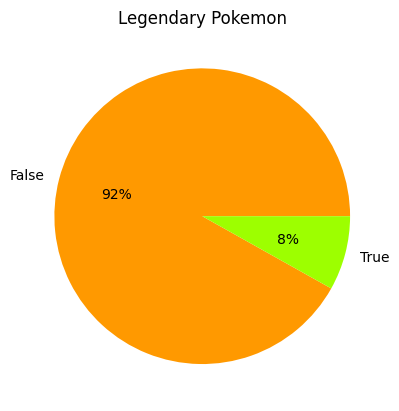

In [15]:
data_plot  = df['Legendary'].value_counts().to_list()
label_plot = df['Legendary'].value_counts().index.to_list()

title = 'Legendary Pokemon'

color = sns.color_palette('gist_rainbow')

plot       = plt.pie(data_plot, labels=label_plot, colors=color, autopct='%.0f%%')
plot_title = plt.title(title)

plt.show()

In [16]:
df['Legendary'].value_counts()

,count
Legendary,
False,735
True,65


In [17]:
from tabulate import tabulate

# Function to find min and max values with names for each column grouped by generation
def find_min_max(df, group_col, columns):
    min_max_dict = {}
    for col in columns:
        min_values = df.loc[df.groupby(group_col)[col].idxmin()]
        max_values = df.loc[df.groupby(group_col)[col].idxmax()]
        min_max_dict[col] = {
            'min': min_values[[group_col, 'Name', col]].rename(columns={col: f'{col}_min'}),
            'max': max_values[[group_col, 'Name', col]].rename(columns={col: f'{col}_max'})
        }
    return min_max_dict

# Specify columns to find min and max values
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']

# Find min and max values
min_max_values = find_min_max(df, 'Generation', attributes)

# Display results
for col, min_max in min_max_values.items():
    print(f"Column: {col}")
    print("Min values:")
    print(tabulate(min_max['min'], headers='keys', tablefmt='pretty'))
    print("Max values:")
    print(tabulate(min_max['max'], headers='keys', tablefmt='pretty'))
    print("\n")


Column: HP
Min values:
+-----+------------+----------+--------+
|     | Generation |   Name   | HP_min |
+-----+------------+----------+--------+
| 55  |     1      | Diglett  |   10   |
| 186 |     2      |  Pichu   |   20   |
| 316 |     3      | Shedinja |   1    |
| 487 |     4      | Mime Jr. |   20   |
| 603 |     5      | Venipede |   30   |
| 727 |     6      | Bunnelby |   38   |
+-----+------------+----------+--------+
Max values:
+-----+------------+-----------+--------+
|     | Generation |   Name    | HP_max |
+-----+------------+-----------+--------+
| 121 |     1      |  Chansey  |  250   |
| 261 |     2      |  Blissey  |  255   |
| 351 |     3      |  Wailord  |  170   |
| 473 |     4      | Drifblim  |  150   |
| 655 |     5      | Alomomola |  165   |
| 792 |     6      |  Xerneas  |  126   |
+-----+------------+-----------+--------+


Column: Attack
Min values:
+-----+------------+---------+------------+
|     | Generation |  Name   | Attack_min |
+-----+-----------

In [18]:
from tabulate import tabulate

# Function to find min and max values with names for each column grouped by generation
def find_min_max(df, group_col, columns):
    min_max_dict = {}
    for col in columns:
        min_values = df.loc[df.groupby(group_col)[col].idxmin()]
        max_values = df.loc[df.groupby(group_col)[col].idxmax()]
        min_max_dict[col] = {
            'min': min_values[[group_col, 'Name', col]].rename(columns={col: f'{col}_min'}),
            'max': max_values[[group_col, 'Name', col]].rename(columns={col: f'{col}_max'})
        }
    return min_max_dict

# Find min and max values
min_max_values = find_min_max(df, 'Legendary', attributes)

# Display results
for col, min_max in min_max_values.items():
    print(f"Column: {col}")
    print("Min values:")
    print(tabulate(min_max['min'], headers='keys', tablefmt='pretty'))
    print("Max values:")
    print(tabulate(min_max['max'], headers='keys', tablefmt='pretty'))
    print("\n")


Column: HP
Min values:
+-----+-----------+--------------------+--------+
|     | Legendary |        Name        | HP_min |
+-----+-----------+--------------------+--------+
| 316 |   False   |      Shedinja      |   1    |
| 428 |   True    | DeoxysNormal Forme |   50   |
+-----+-----------+--------------------+--------+
Max values:
+-----+-----------+-----------------------+--------+
|     | Legendary |         Name          | HP_max |
+-----+-----------+-----------------------+--------+
| 261 |   False   |        Blissey        |  255   |
| 544 |   True    | GiratinaAltered Forme |  150   |
+-----+-----------+-----------------------+--------+


Column: Attack
Min values:
+-----+-----------+---------+------------+
|     | Legendary |  Name   | Attack_min |
+-----+-----------+---------+------------+
| 121 |   False   | Chansey |     5      |
| 415 |   True    | Regice  |     50     |
+-----+-----------+---------+------------+
Max values:
+-----+-----------+-------------------------+---

In [19]:
def find_min_max(df, group_col, columns):
    min_max_dict = {}
    for col in columns:
        min_values = df.loc[df.groupby(group_col)[col].idxmin()]
        max_values = df.loc[df.groupby(group_col)[col].idxmax()]
        min_max_dict[col] = {
            'min': min_values[[group_col, 'Name', col]].rename(columns={col: f'{col}_min'}).sort_values(f'{col}_min', ascending=False),
            'max': max_values[[group_col, 'Name', col]].rename(columns={col: f'{col}_max'}).sort_values(f'{col}_max', ascending=False)
        }
    return min_max_dict

min_max_values = find_min_max(df, 'Type 1', attributes)

# Display results
for col, min_max in min_max_values.items():
    print(f"Column: {col}")
    print("Min values:")
    print(tabulate(min_max['min'], headers='keys', tablefmt='pretty'))
    print("Max values:")
    print(tabulate(min_max['max'], headers='keys', tablefmt='pretty'))
    print("\n")


Column: HP
Min values:
+-----+----------+-----------+--------+
|     |  Type 1  |   Name    | HP_min |
+-----+----------+-----------+--------+
| 159 |  Dragon  |  Dratini  |   41   |
| 410 |  Steel   |  Beldum   |   40   |
| 790 |  Flying  |  Noibat   |   40   |
| 42  |   Fire   |  Vulpix   |   38   |
| 643 |   Ice    | Vanillite |   36   |
| 28  |  Poison  |   Ekans   |   35   |
| 189 |  Fairy   |  Togepi   |   35   |
| 284 |   Dark   | Poochyena |   35   |
| 206 |  Grass   |  Sunkern  |   30   |
| 334 | Fighting | Meditite  |   30   |
| 151 |   Rock   |  Kabuto   |   30   |
| 24  |  Normal  |  Rattata  |   30   |
| 487 | Psychic  | Mime Jr.  |   20   |
| 139 |  Water   | Magikarp  |   20   |
| 388 |  Ghost   |  Duskull  |   20   |
| 186 | Electric |   Pichu   |   20   |
| 55  |  Ground  |  Diglett  |   10   |
| 316 |   Bug    | Shedinja  |   1    |
+-----+----------+-----------+--------+
Max values:
+-----+----------+-----------+--------+
|     |  Type 1  |   Name    | HP_max |
+----

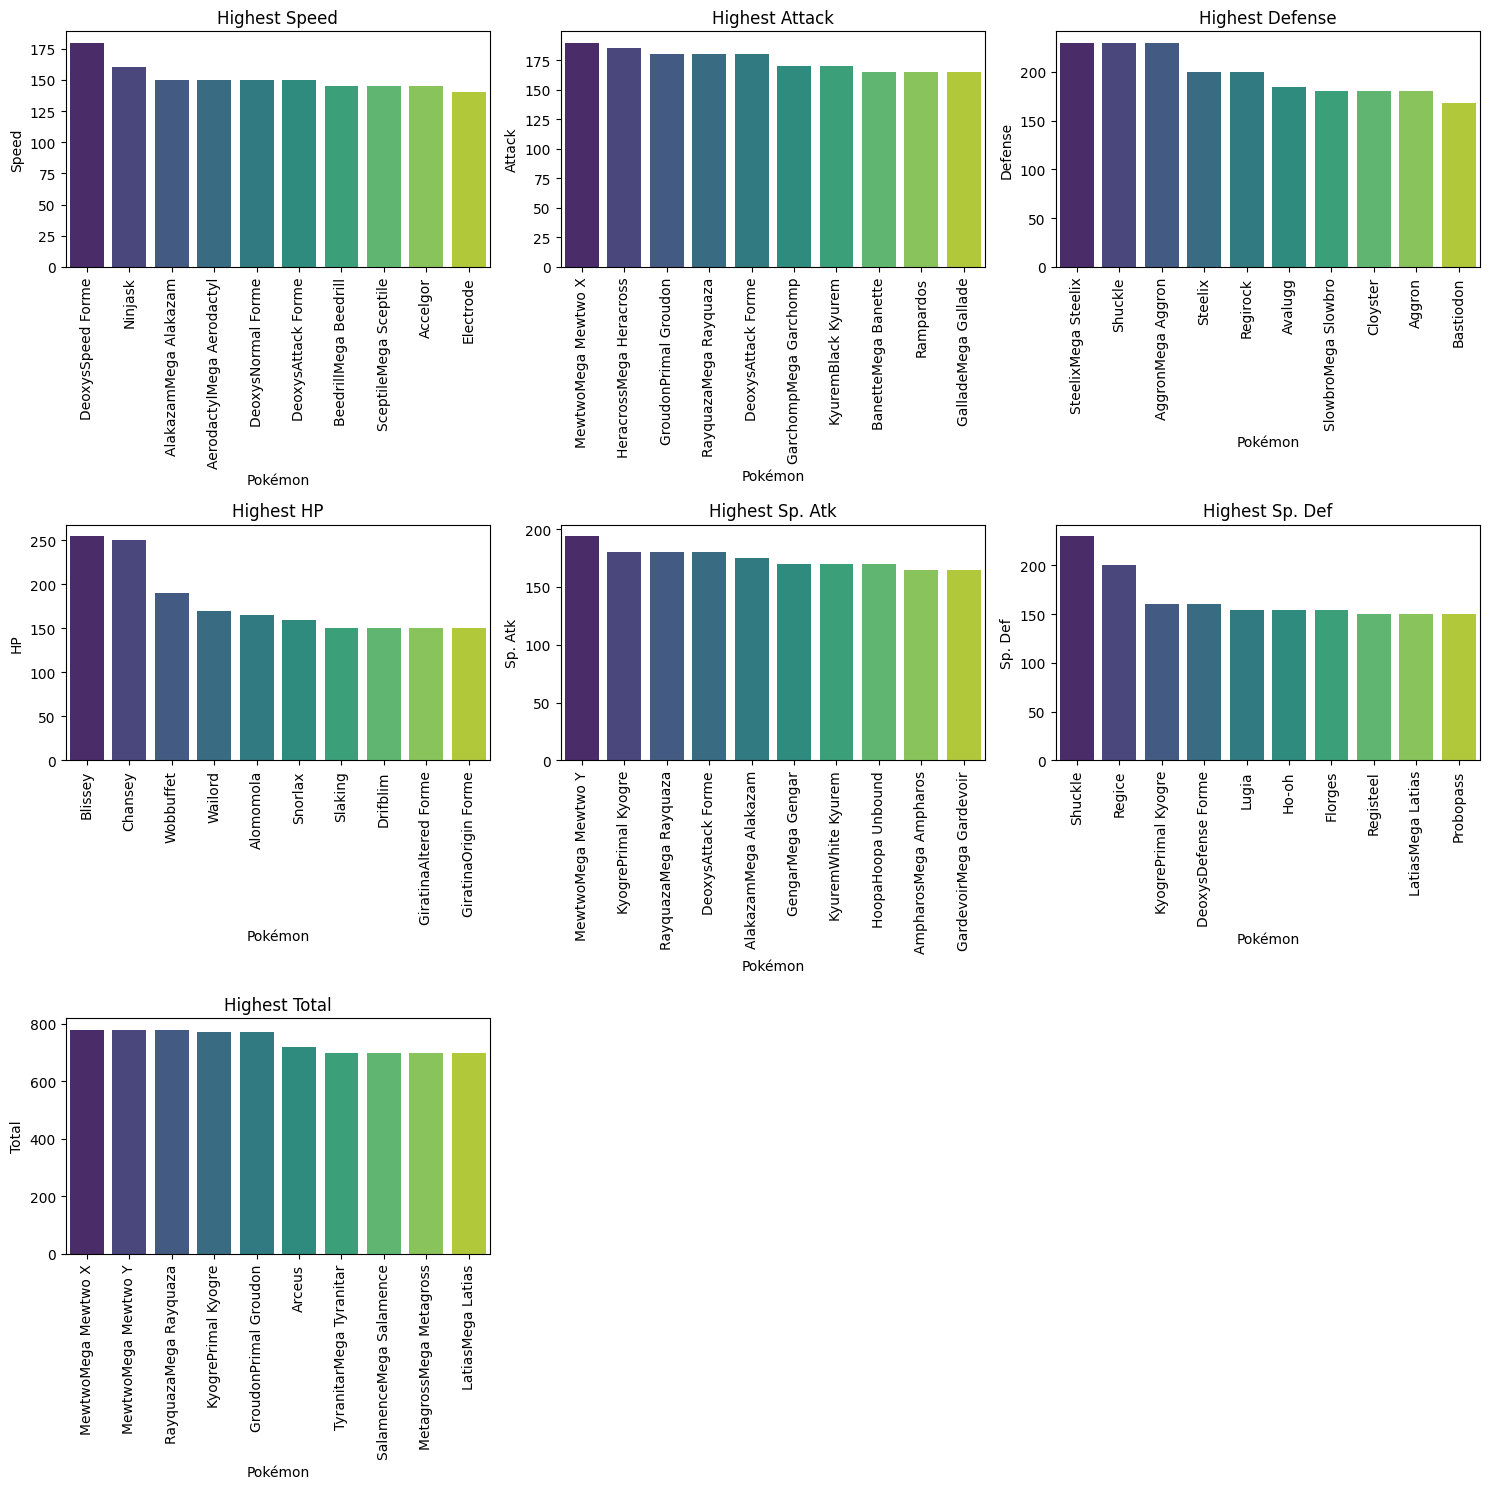

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of attributes to analyze
attributes = ['Speed', 'Attack', 'Defense', 'HP', 'Sp. Atk', 'Sp. Def', 'Total']

# Create subplots
num_cols = len(attributes)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axs = axs.flatten()

# Barplot for each attribute
for i, attr in enumerate(attributes):
    # Find Pokémon with the highest value for the current attribute
    top_pokemon = df.nlargest(10, attr)  # Select top 10 Pokémon with the highest value for the attribute

    # Plot bar chart
    sns.barplot(x=top_pokemon['Name'], y=top_pokemon[attr], palette='viridis', ax=axs[i])
    axs[i].set_title(f'Highest {attr}')
    axs[i].tick_params(axis='x', rotation=90)
    axs[i].set_xlabel('Pokémon')
    axs[i].set_ylabel(attr)

# Remove extra empty subplots
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()


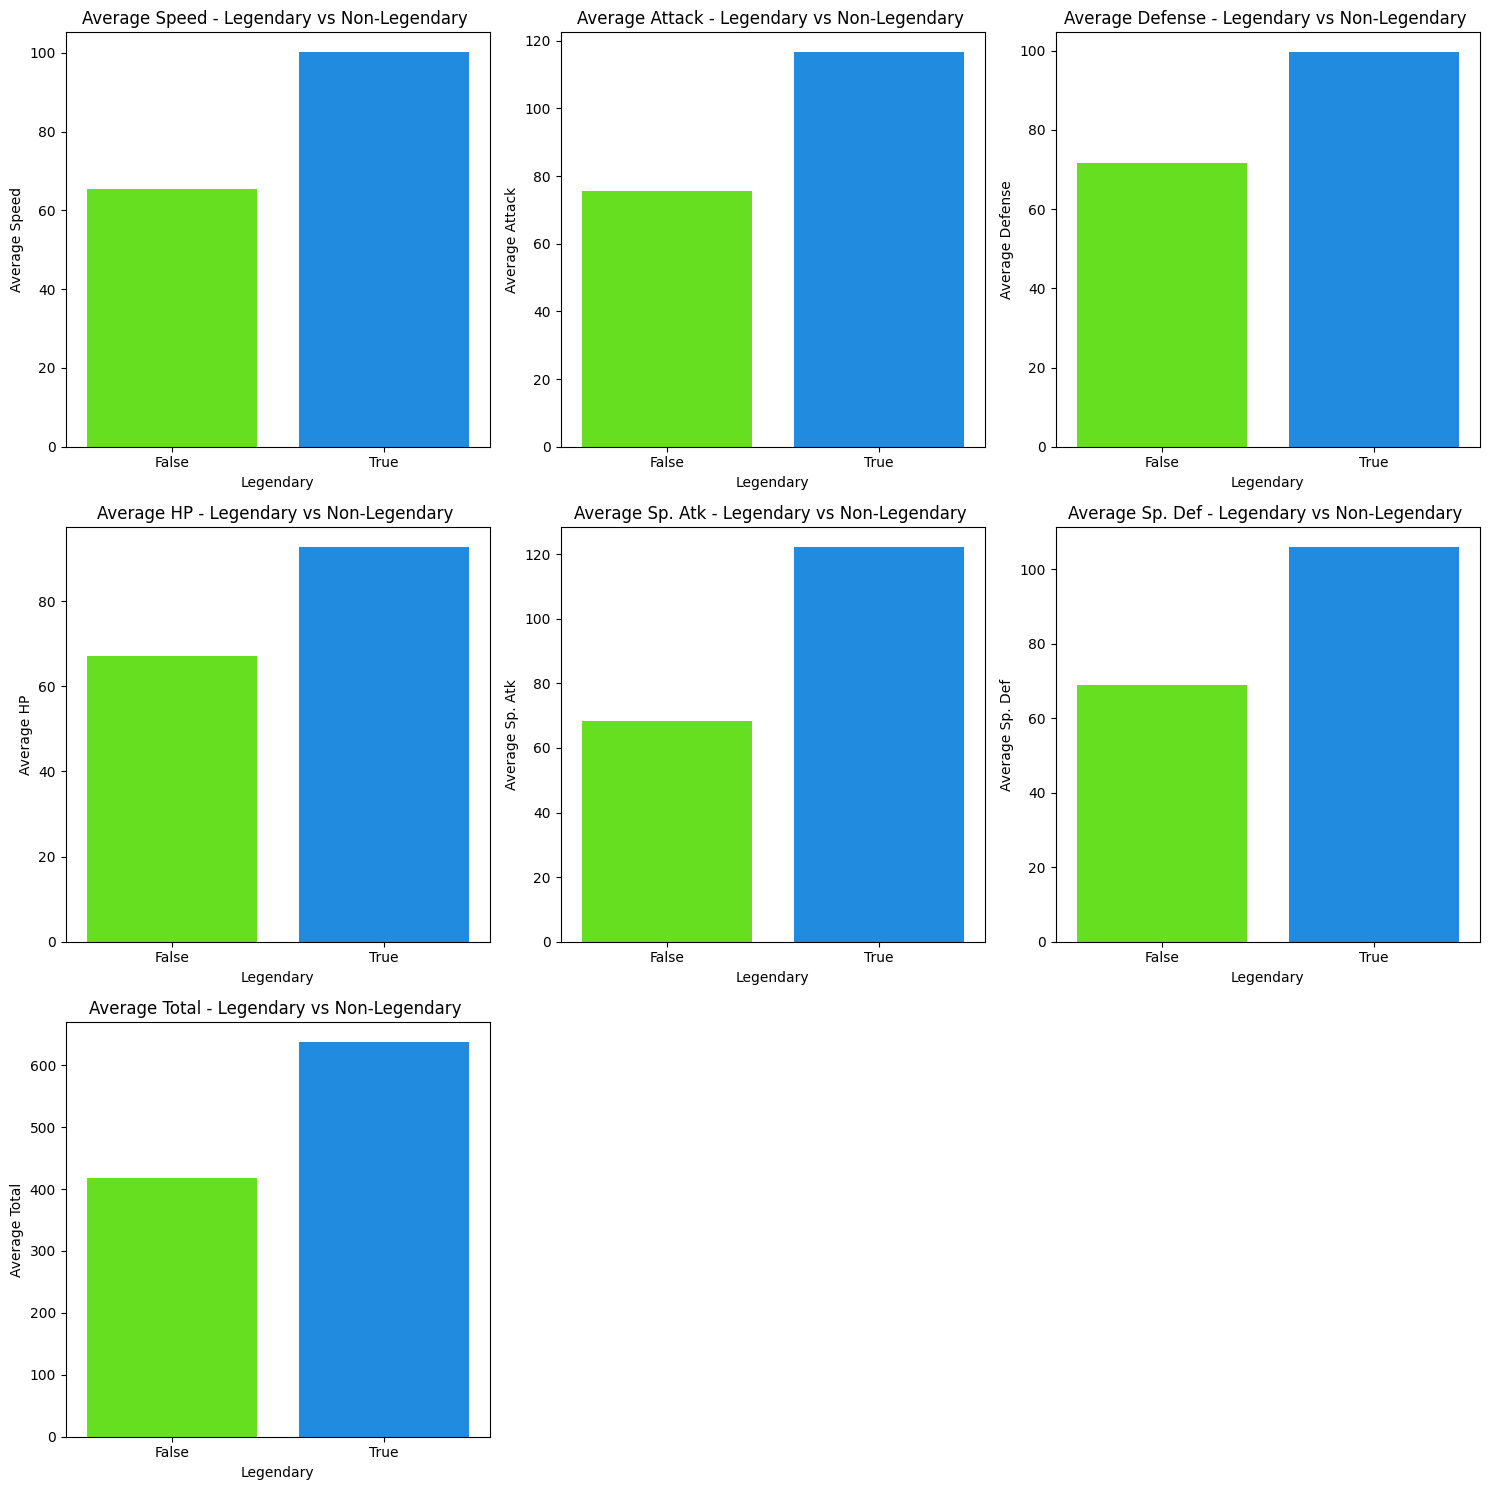

In [52]:
# Create subplots
num_cols = len(attributes)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axs = axs.flatten()

# Barplot for each attribute
for i, attr in enumerate(attributes):
    # Calculate the average value of the attribute for each generation
    avg_stats_per_gen = df.groupby('Legendary')[attr].mean().reset_index()

    # Plot bar chart
    sns.barplot(x='Legendary', y=attr, data=avg_stats_per_gen, palette='gist_rainbow', ax=axs[i])
    axs[i].set_title(f'Average {attr} - Legendary vs Non-Legendary ')
    axs[i].set_xlabel('Legendary')
    axs[i].set_ylabel(f'Average {attr}')

# Remove extra empty subplots
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()


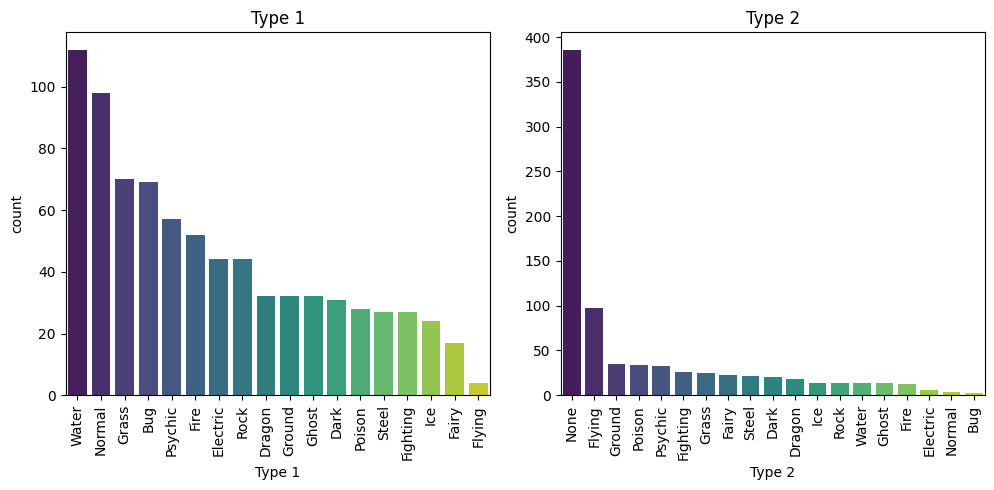

In [53]:
#Univariate analysis of independent variables part 1
#List of variables
column_name_list_bar = ['Type 1', 'Type 2']

#Create subplots
num_cols = len(column_name_list_bar)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Barplot for each variables
for i, var in enumerate(column_name_list_bar):
    order = df[var].value_counts().index
    sns.countplot(x=var, data=df, ax=axs[i], order=order, palette='viridis')
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

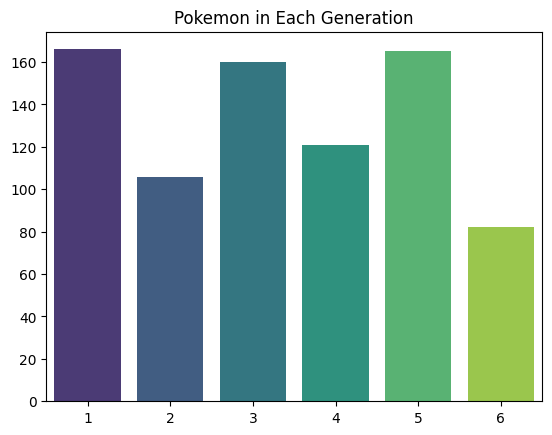

In [54]:
data_plot  = df['Generation'].value_counts().to_list()
label_plot = df['Generation'].value_counts().index.to_list()

title = 'Pokemon in Each Generation'

plot       = sns.barplot(x = label_plot, y = data_plot, palette='viridis')
plot_title = plt.title(title)

plt.show()

In [55]:
df['Generation'].value_counts()

,count
Generation,
1,166
5,165
3,160
4,121
2,106
6,82


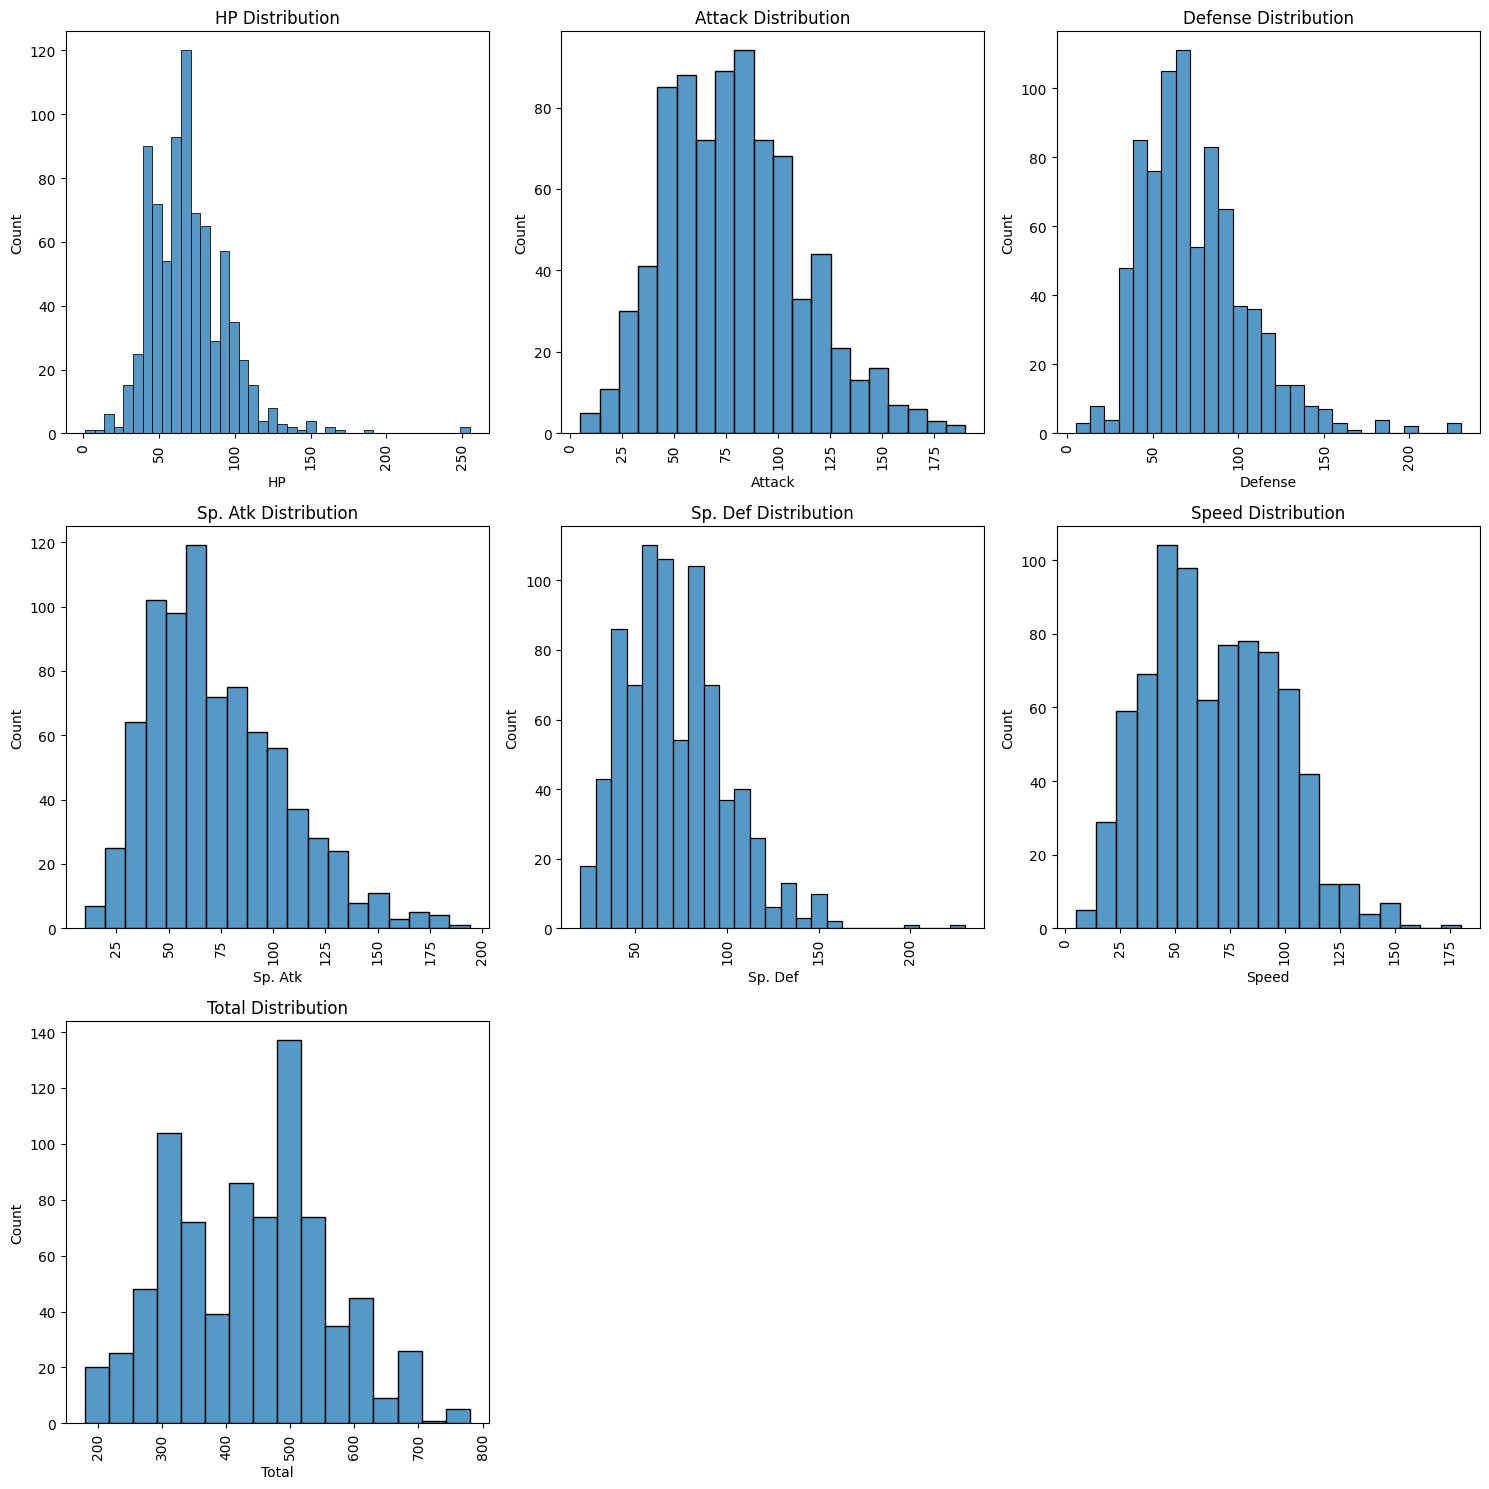

In [56]:
#Histogram overlay of 'target' with independent variables part 2
column_name_list = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']

#Create subplots
num_cols = len(column_name_list)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Barplot for each variables
for i, var in enumerate (column_name_list):
  sns.histplot(x=var, data=df, ax=axs[i])
  axs[i].set_title(var + " " + "Distribution")
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

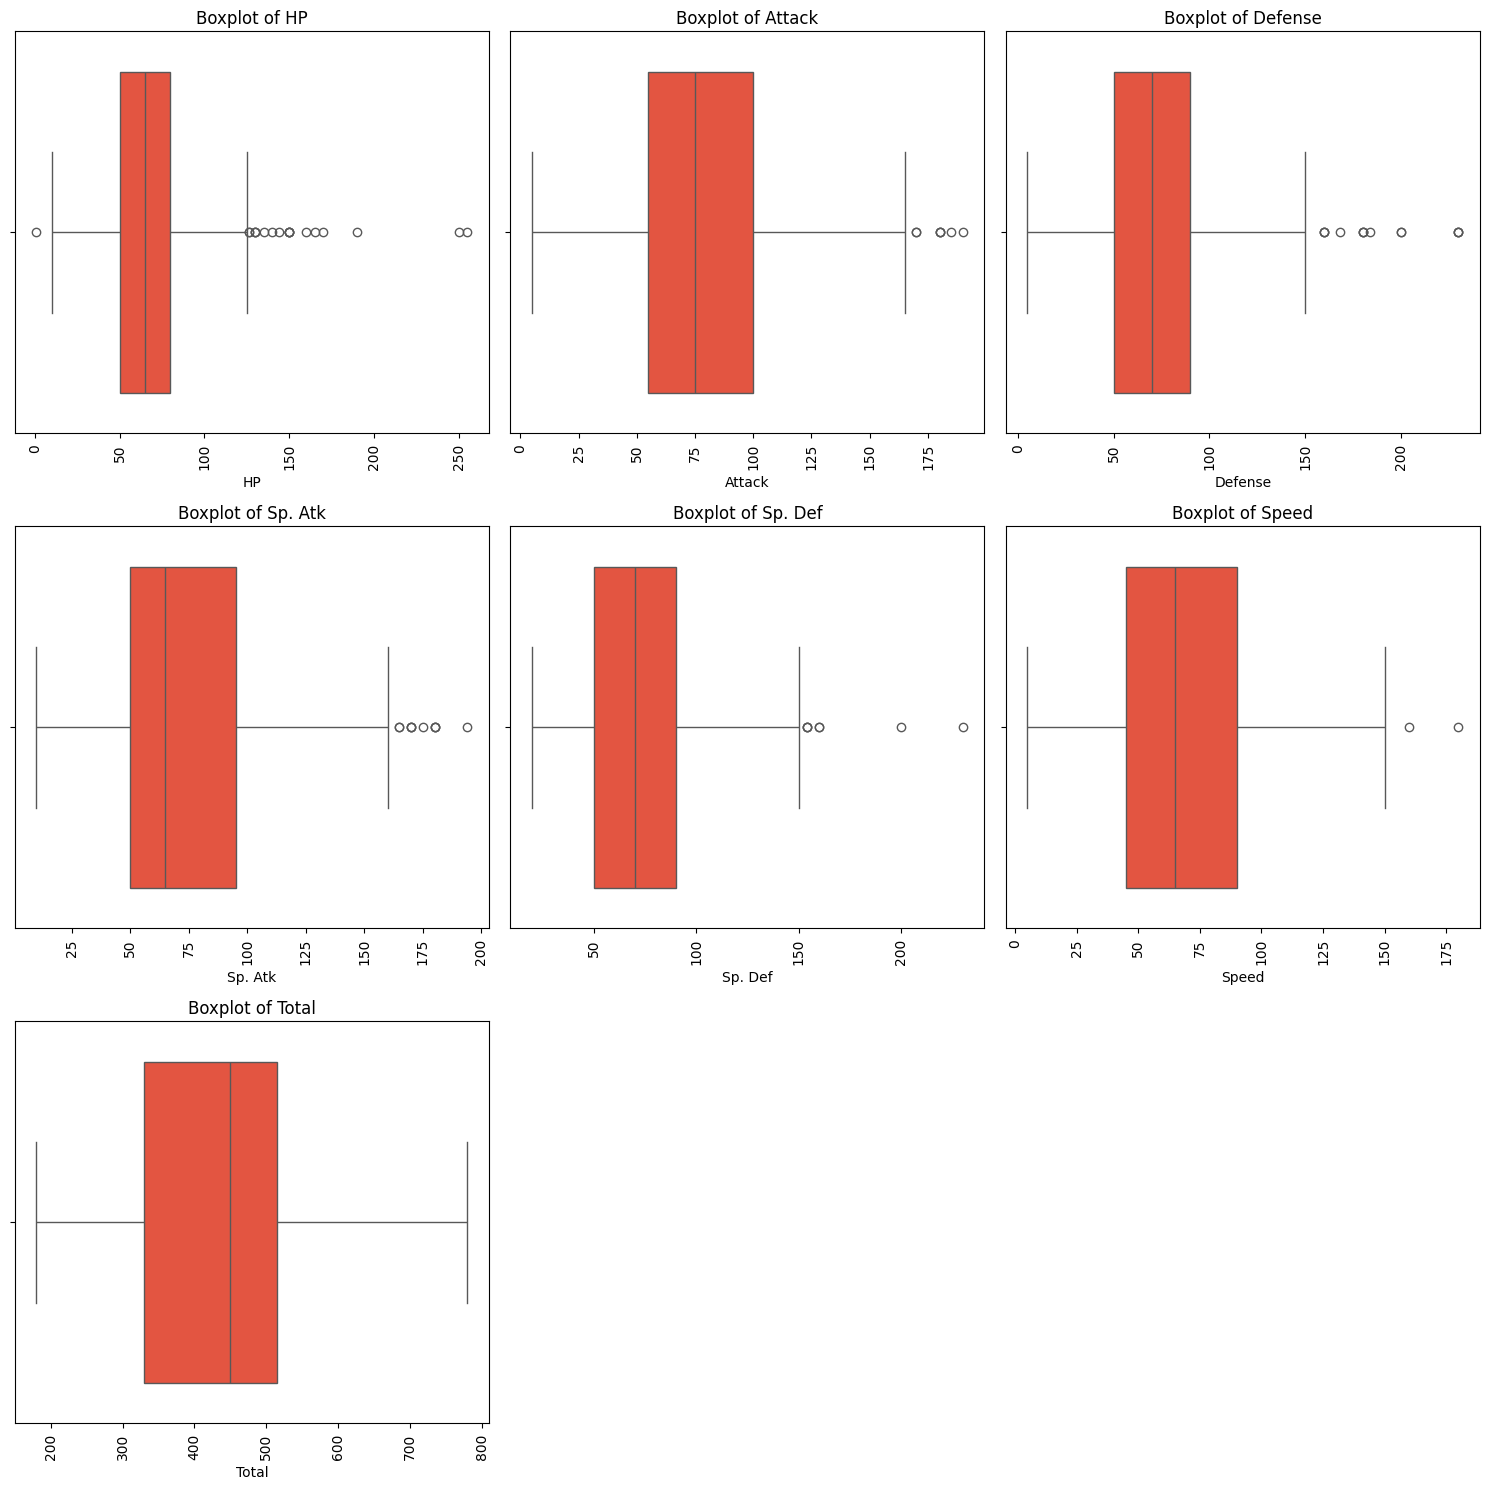

In [57]:
#Create subplots
num_cols = len(column_name_list)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Barplot for each variables
for i, var in enumerate (column_name_list):
  sns.boxplot(x=var, data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title("Boxplot of" + " " + var)
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

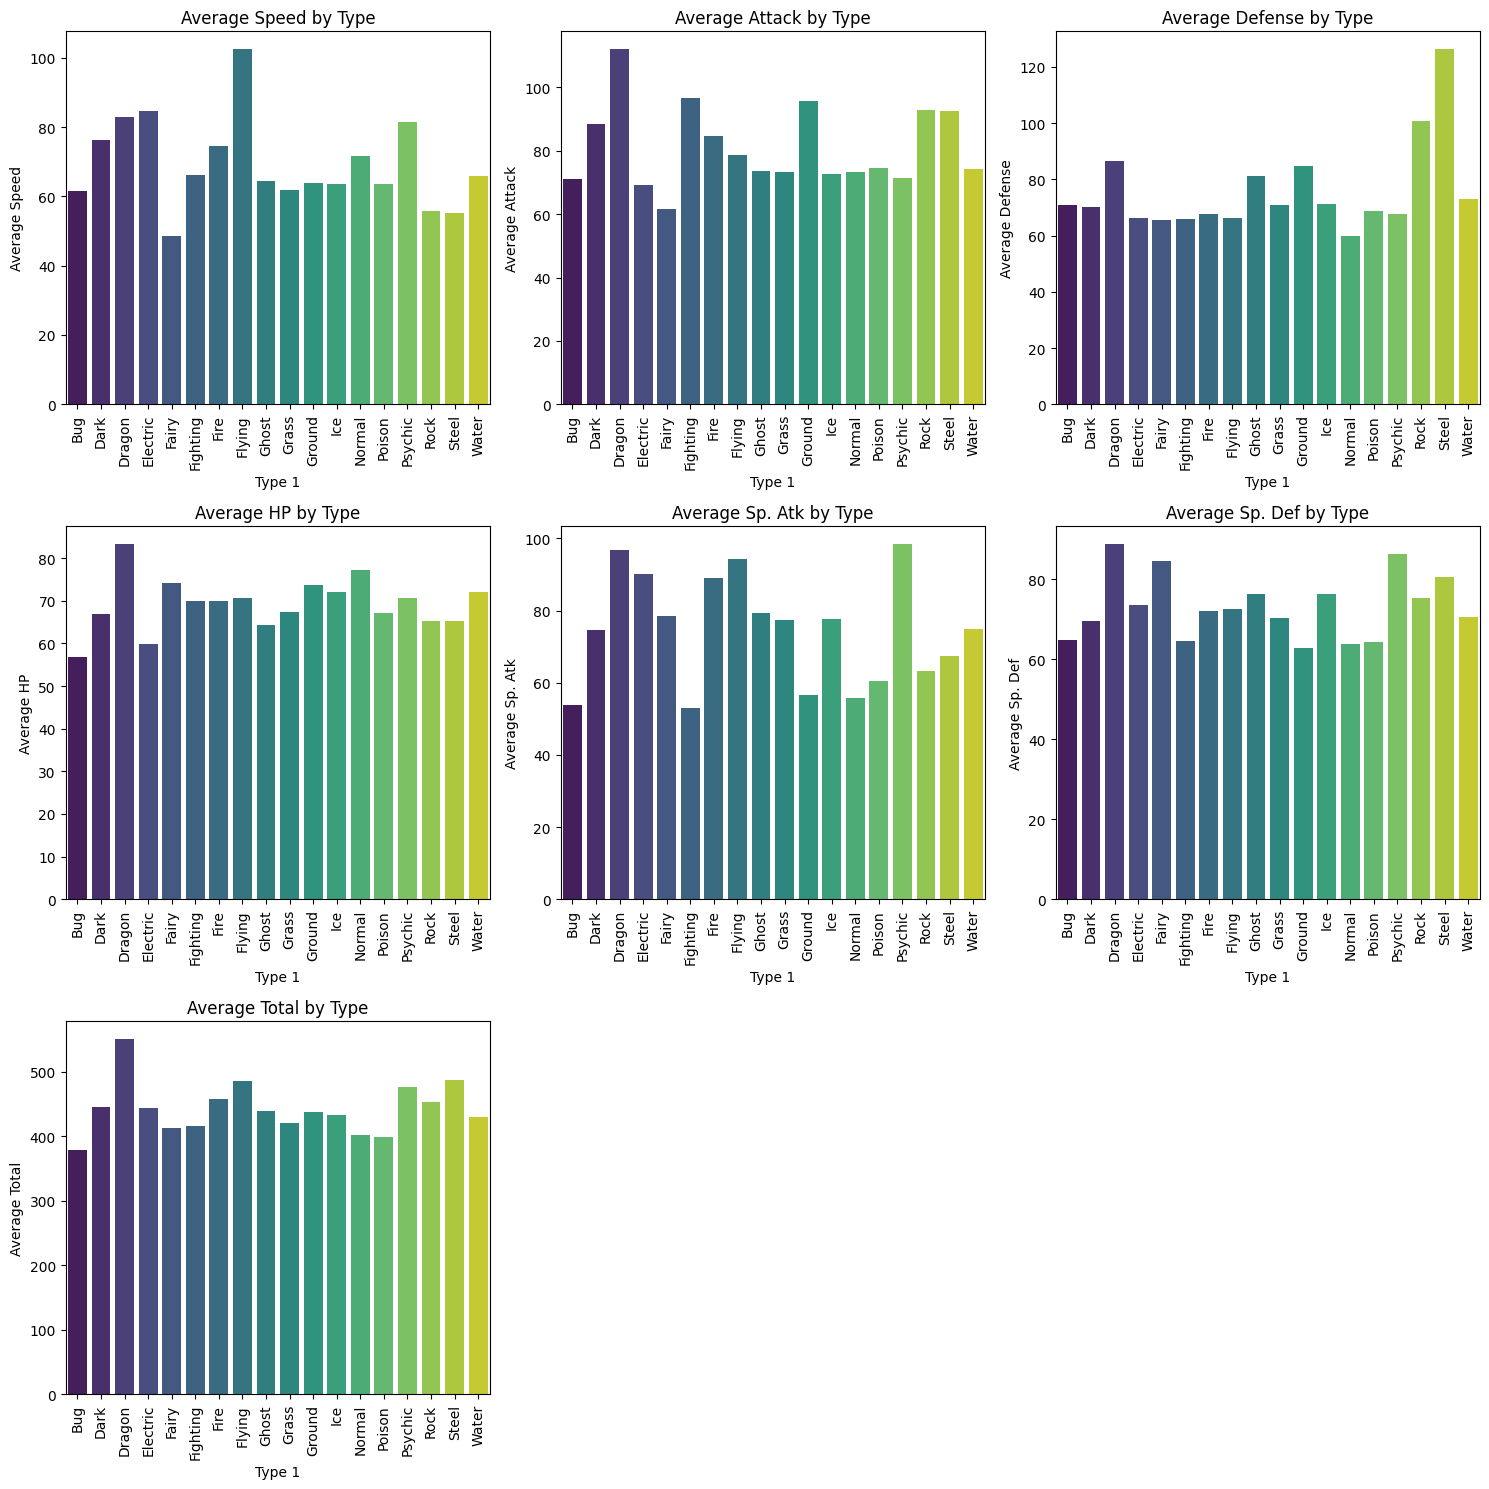

In [58]:
# Create subplots
num_cols = len(attributes)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axs = axs.flatten()

# Barplot for each attribute
for i, attr in enumerate(attributes):
    # Calculate the average value of the attribute for each generation
    avg_stats_per_type = df.groupby('Type 1')[attr].mean().reset_index()

    # Plot bar chart
    sns.barplot(x='Type 1', y=attr, data=avg_stats_per_type, palette='viridis', ax=axs[i])
    axs[i].set_title(f'Average {attr} by Type')
    axs[i].set_xlabel('Type 1')
    axs[i].tick_params(axis='x', rotation=90)
    axs[i].set_ylabel(f'Average {attr}')

# Remove extra empty subplots
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()


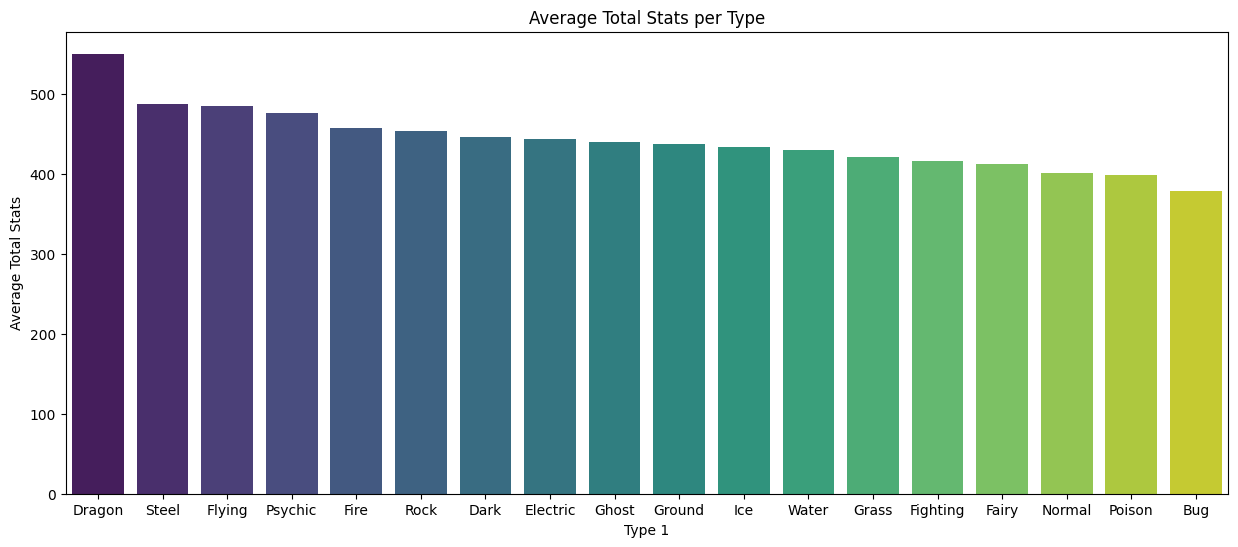

In [59]:
# Calculate average Total stats per generation
avg_total_per_type = df.groupby('Type 1')['Total'].mean().reset_index().sort_values(by='Total', ascending=False)

# Create the bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x='Type 1', y='Total', data=avg_total_per_type, palette='viridis')
plt.title('Average Total Stats per Type')
plt.xlabel('Type 1')
plt.ylabel('Average Total Stats')
plt.show()

In [60]:
avg_total_per_type

,Type 1,Total
2,Dragon,550.531250
16,Steel,487.703704
7,Flying,485.000000
14,Psychic,475.947368
6,Fire,458.076923
15,Rock,453.750000
1,Dark,445.741935
3,Electric,443.409091
8,Ghost,439.562500
10,Ground,437.500000


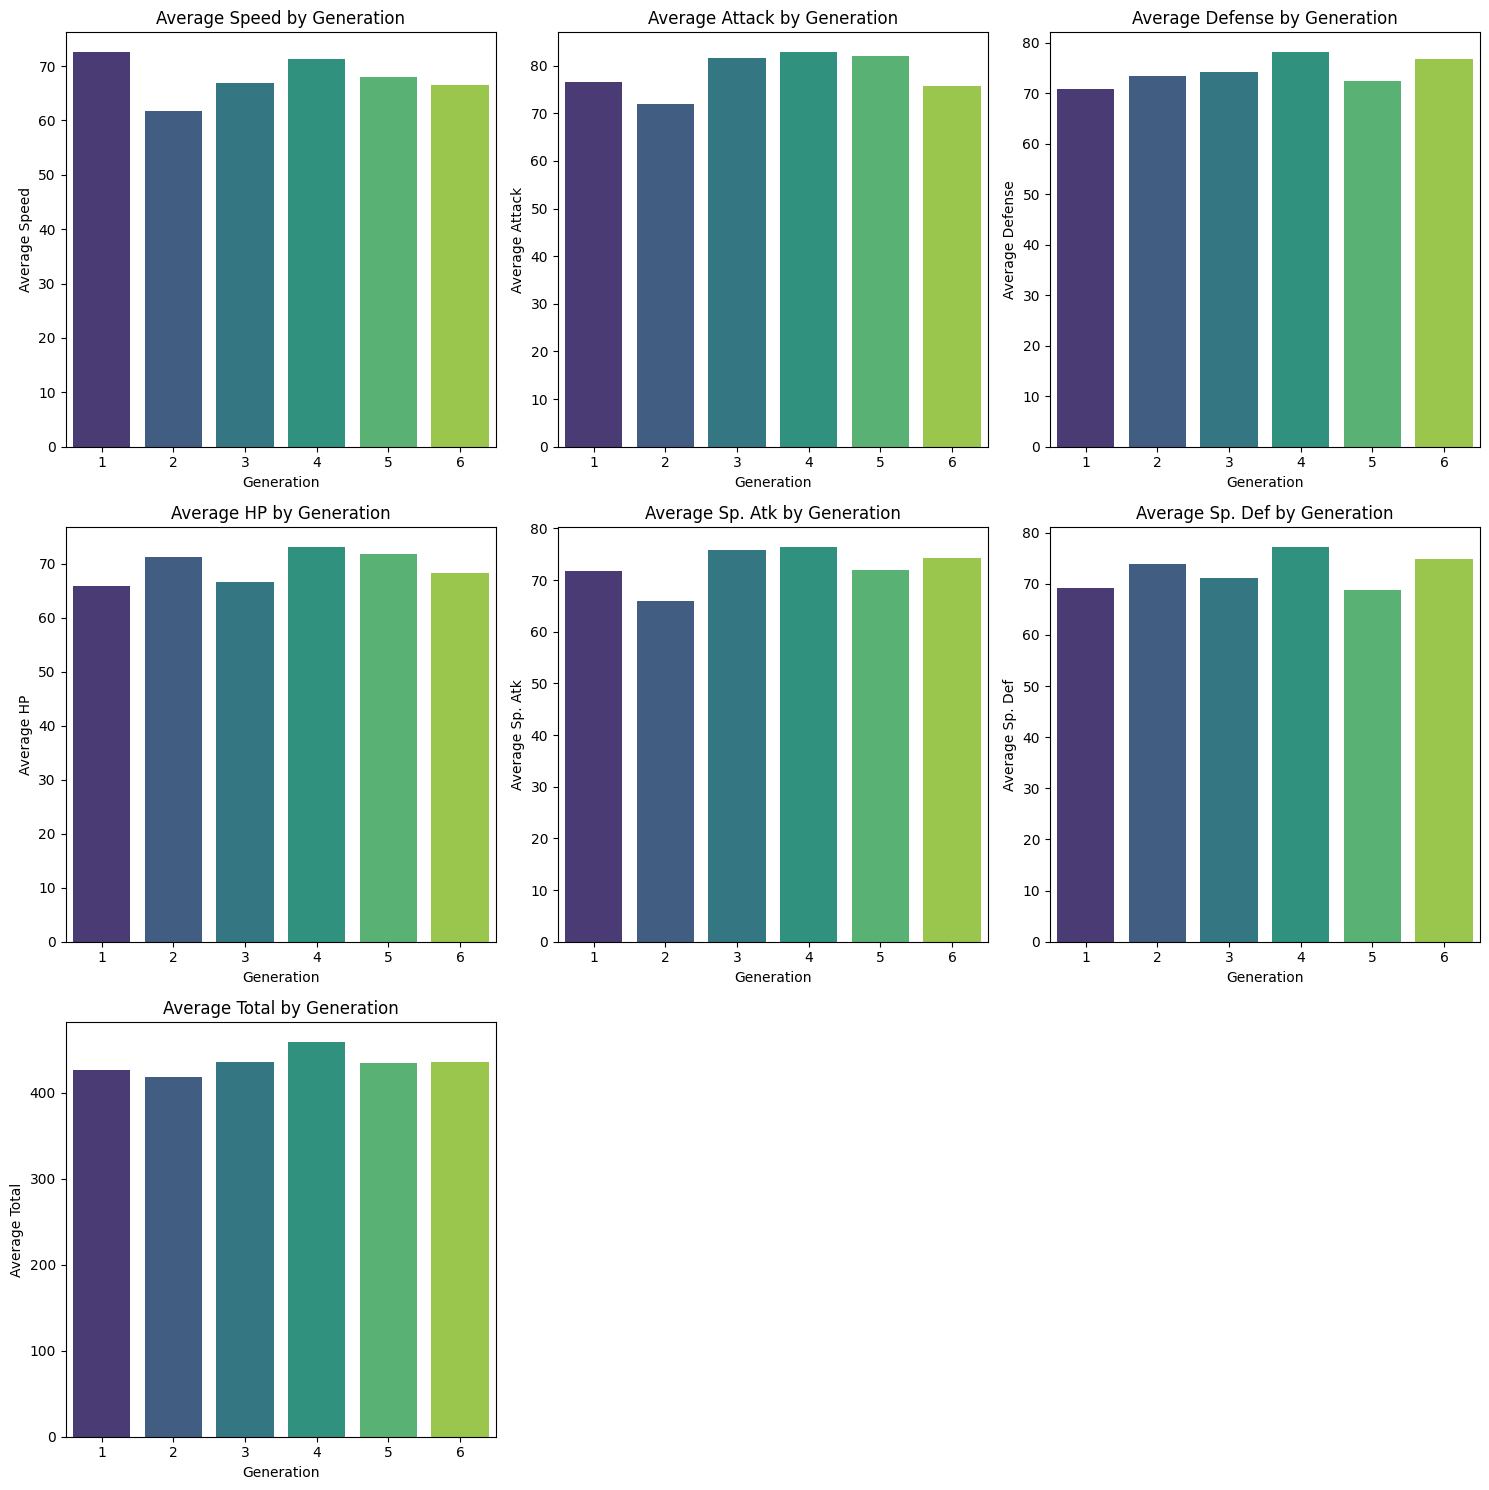

In [61]:
# Create subplots
num_cols = len(attributes)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axs = axs.flatten()

# Barplot for each attribute
for i, attr in enumerate(attributes):
    # Calculate the average value of the attribute for each generation
    avg_stats_per_gen = df.groupby('Generation')[attr].mean().reset_index()

    # Plot bar chart
    sns.barplot(x='Generation', y=attr, data=avg_stats_per_gen, palette='viridis', ax=axs[i])
    axs[i].set_title(f'Average {attr} by Generation')
    axs[i].set_xlabel('Generation')
    axs[i].set_ylabel(f'Average {attr}')

# Remove extra empty subplots
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()


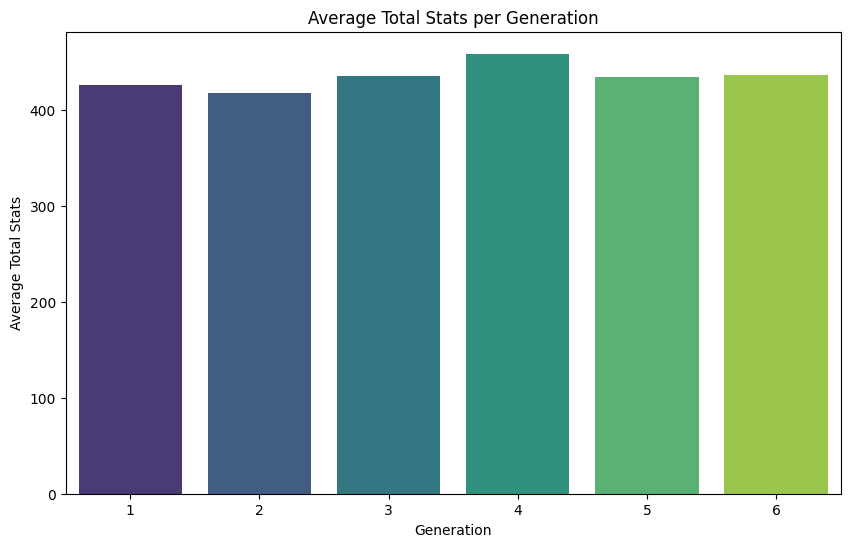

In [62]:
# Calculate average Total stats per generation
avg_total_per_gen = df.groupby('Generation')['Total'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Generation', y='Total', data=avg_total_per_gen, palette='viridis')
plt.title('Average Total Stats per Generation')
plt.xlabel('Generation')
plt.ylabel('Average Total Stats')
plt.show()

In [63]:
avg_total_per_gen

,Generation,Total
0,1,426.813253
1,2,418.283019
2,3,436.225000
3,4,459.016529
4,5,434.987879
5,6,436.378049


## Data Preprocessing Part 2

In [64]:
df = df.drop(['#', 'Name', 'Generation'], axis=1)

In [65]:
#Labeling categorical data
legend = {
    "False": 0,
    "True": 1
}

element = {
    "Water": 0,
    "Normal": 1,
    "Grass": 2,
    "Bug": 3,
    "Psychic": 4,
    "Fire": 5,
    "Electric": 6,
    "Rock": 7,
    "Dragon": 8,
    "Ground": 9,
    "Ghost": 10,
    "Dark": 11,
    "Poison": 12,
    "Steel": 13,
    "Fighting": 14,
    "Ice": 15,
    "Fairy": 16,
    "Flying": 17,
    "None": 18
}

df['Legendary'] = df['Legendary'].map(legend)
df['Type 1'] = df['Type 1'].map(element)
df['Type 2'] = df['Type 2'].map(element)

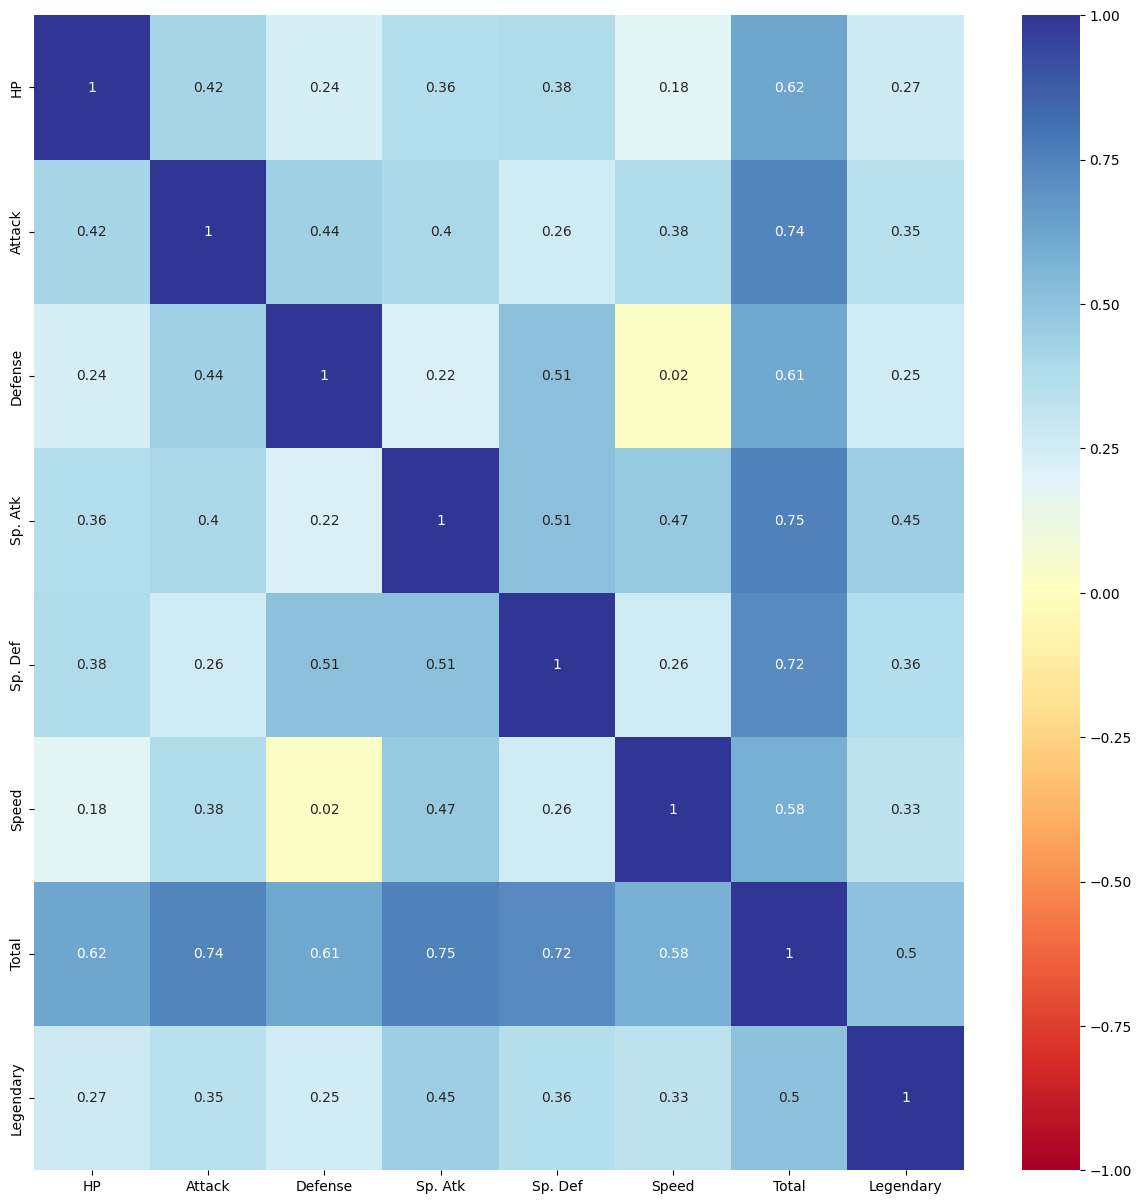

In [66]:
#Correlations between features
matrix = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total', 'Legendary']].corr().round(2)
plt.figure(figsize=(15,15))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='RdYlBu')
plt.show()

## Balancing Data + Splitting the dataset into the Training set and Test set

In [67]:
#Defining x and y
x = df.drop(columns=['Legendary'])
y = df['Legendary']

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [70]:
x_train.shape, x_test.shape

((640, 9), (160, 9))

## Modelling

### XGBoost

In [77]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)
y_pred_xgb = classifier_xgb.predict(x_test)

In [78]:
print('Training-set accuracy score:', classifier_xgb.score(x_train, y_train))
print('Test-set accuracy score:', classifier_xgb.score(x_test, y_test))

Training-set accuracy score: 0.9984375
Test-set accuracy score: 0.96875


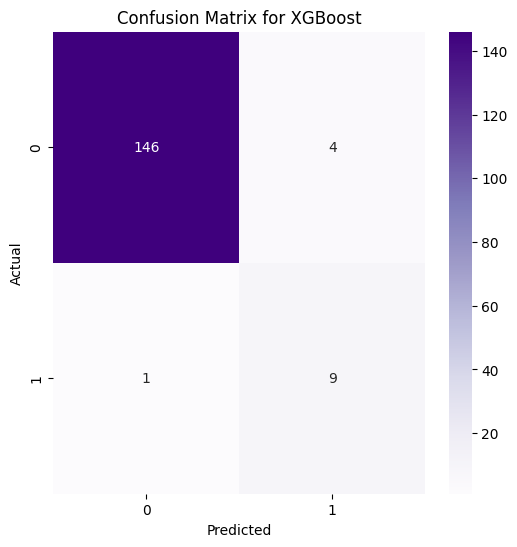

In [79]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred_xgb), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [80]:
#Classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       150
           1       0.69      0.90      0.78        10

    accuracy                           0.97       160
   macro avg       0.84      0.94      0.88       160
weighted avg       0.97      0.97      0.97       160



In [81]:
roc_auc_score(y_test, y_pred_xgb)

0.9366666666666666

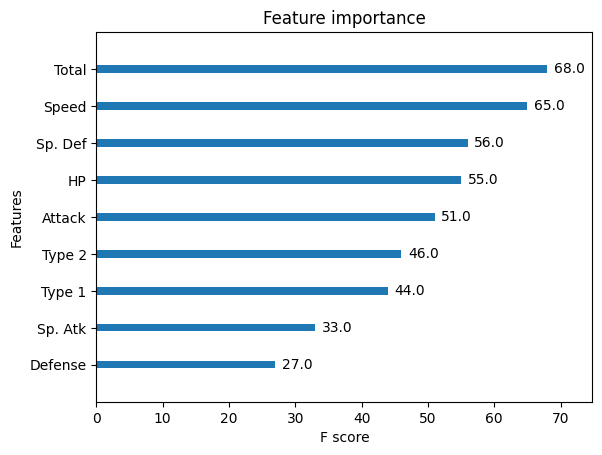

In [101]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(classifier_xgb)
plt.grid(False)
plt.show()

### Export Model

In [102]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(classifier_xgb, f)

In [103]:
!pip freeze >> requirements.txt